# Analysis of Yelp Business Intelligence Data: Graam Liu

We will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from [Kaggle](https://www.kaggle.com/yelp-dataset/yelp-dataset) although we have taken steps to pull this data into a publis s3 bucket: `s3://sta9760-yelpdataset/yelp-light/*business.json`

# Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install `pandas` and `matplotlib`

In [44]:
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("pandas==1.0.3")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a0/34/895006117f6fce0b4de045c87e154ee4a20c68ec0a4c9a36d900888fb6bc/pyparsing-3.0.6-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/09/6b/6e567cb2e86d4e5939a9233f8734e26021b6a9c1bc4b1edccba236a84cc2/kiwisolver-1.3.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_

## Importing

Now, import the installed packages from the previous block below.

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading Data

We are finally ready to load data. Using `spark` load the data from S3 into a `dataframe` object that we can manipulate further down in our analysis.


In [5]:
df_business = spark.read.json('s3://sta9760f2020spark/yelp/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
df_business.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(address='10913 Bailey Rd', attributes=Row(AcceptsInsurance=None, AgesAllowed=None, Alcohol=None, Ambience=None, BYOB=None, BYOBCorkage=None, BestNights=None, BikeParking='True', BusinessAcceptsBitcoin=None, BusinessAcceptsCreditCards='True', BusinessParking="{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}", ByAppointmentOnly='False', Caters=None, CoatCheck=None, Corkage=None, DietaryRestrictions=None, DogsAllowed=None, DriveThru=None, GoodForDancing=None, GoodForKids='False', GoodForMeal=None, HairSpecializesIn=None, HappyHour=None, HasTV=None, Music=None, NoiseLevel=None, Open24Hours=None, OutdoorSeating=None, RestaurantsAttire=None, RestaurantsCounterService=None, RestaurantsDelivery=None, RestaurantsGoodForGroups=None, RestaurantsPriceRange2='3', RestaurantsReservations=None, RestaurantsTableService=None, RestaurantsTakeOut=None, Smoking=None, WheelchairAccessible=None, WiFi=None), business_id='f9NumwFMBDn751xgFiRbNA', categories='Active Life,

## Overview of Data

Display the number of rows and columns in our dataset.

In [7]:
print(f'Total Columns: {len(df_business.dtypes)}')
print(f'Total Rows: {df_business.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 14
Total Rows: 209,393

Display the DataFrame schema below.

In [117]:
df_business.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Display the first 5 rows with the following columns:

* `business_id`
* `name`
* `city`
* `state`
* `categories`

In [12]:
df_business.select('business_id','name','city','state','categories').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+--------------------+
|         business_id|                name|           city|state|          categories|
+--------------------+--------------------+---------------+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+--------------------+
only showing top 5 rows

# Analyzing Categories

Let's now answer this question: **how many unique categories are represented in this dataset?**

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

* How many businesses are categorized as `Active Life`, for instance
* What are the top 20 most popular categories available?

## Association Table

We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

For instance, given the following:


| business_id | categories |
|-------------|------------|
| abcd123     | a,b,c      |

We would like to derive something like:

| business_id | category |
|-------------|------------|
| abcd123     | a          |
| abcd123     | b          |
| abcd123     | c          |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from your original yelp dataframe.

In [39]:
from pyspark.sql.functions import explode, split
df_business_exploded = df_business.withColumn('categories',explode(split('categories',", ")))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Display the first 5 rows of your association table below.

In [40]:
df_business_exploded.select('business_id','categories').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+
|         business_id|      categories|
+--------------------+----------------+
|f9NumwFMBDn751xgF...|     Active Life|
|f9NumwFMBDn751xgF...|Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|     Guns & Ammo|
|f9NumwFMBDn751xgF...|        Shopping|
|Yzvjg0SayhoZgCljU...|Health & Medical|
+--------------------+----------------+
only showing top 5 rows

## Total Unique Categories

Finally, we are ready to answer the question: **what is the total number of unique categories available?**

Below, implement the code necessary to calculate this figure.

In [41]:
df_business_exploded.select('categories').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1336

## Top Categories By Business

Now let's find the top categories in this dataset by rolling up categories.

### Counts of Businesses / Category

So now, let's unroll our distinct count a bit and display the per count value of businesses per category.

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [42]:
df_business_exploded.groupby('categories').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|      Dermatologists|  341|
|      Paddleboarding|   36|
|        Aerial Tours|   28|
|         Hobby Shops|  828|
|          Bubble Tea|  720|
|             Embassy|   13|
|            Handyman|  682|
|             Tanning|  938|
|      Aerial Fitness|   29|
|             Tempura|    1|
|             Falafel|  159|
|       Outlet Stores|  399|
|        Summer Camps|  318|
|     Clothing Rental|   55|
|      Sporting Goods| 2311|
|     Cooking Schools|  118|
|  College Counseling|   15|
|  Lactation Services|   50|
|Ski & Snowboard S...|   50|
|             Museums|  359|
+--------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories

With this data available, let us now build a barchart of the top 20 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [113]:
df_business_barchart = df_business_exploded.groupby('categories').count().orderBy('count',ascending=False)
df_business_barchart = df_business_barchart.toPandas()
df_business_barchart = df_business_barchart[0:20]
df_business_barchart

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                   categories  count
0                 Restaurants  63944
1                    Shopping  34644
2                        Food  32991
3               Home Services  22487
4               Beauty & Spas  20520
5            Health & Medical  19227
6              Local Services  15783
7                  Automotive  14720
8                   Nightlife  14211
9                        Bars  12400
10  Event Planning & Services  11263
11                Active Life  10225
12               Coffee & Tea   8415
13                    Fashion   8374
14                  Fast Food   8106
15                 Sandwiches   8064
16     American (Traditional)   7596
17              Home & Garden   7331
18                Hair Salons   7303
19                      Pizza   7302

In [230]:
plt.figure(figsize = (22, 8))
plt.title('Top Categories by Business', fontsize = 16)
plt.ylabel('category', fontsize = 13 )
plt.xlabel('count', fontsize = 13 )

plt.barh(y = df_business_barchart['categories'],
        width = df_business_barchart['count'], 
        color = "lightblue")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<BarContainer object of 20 artists>

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

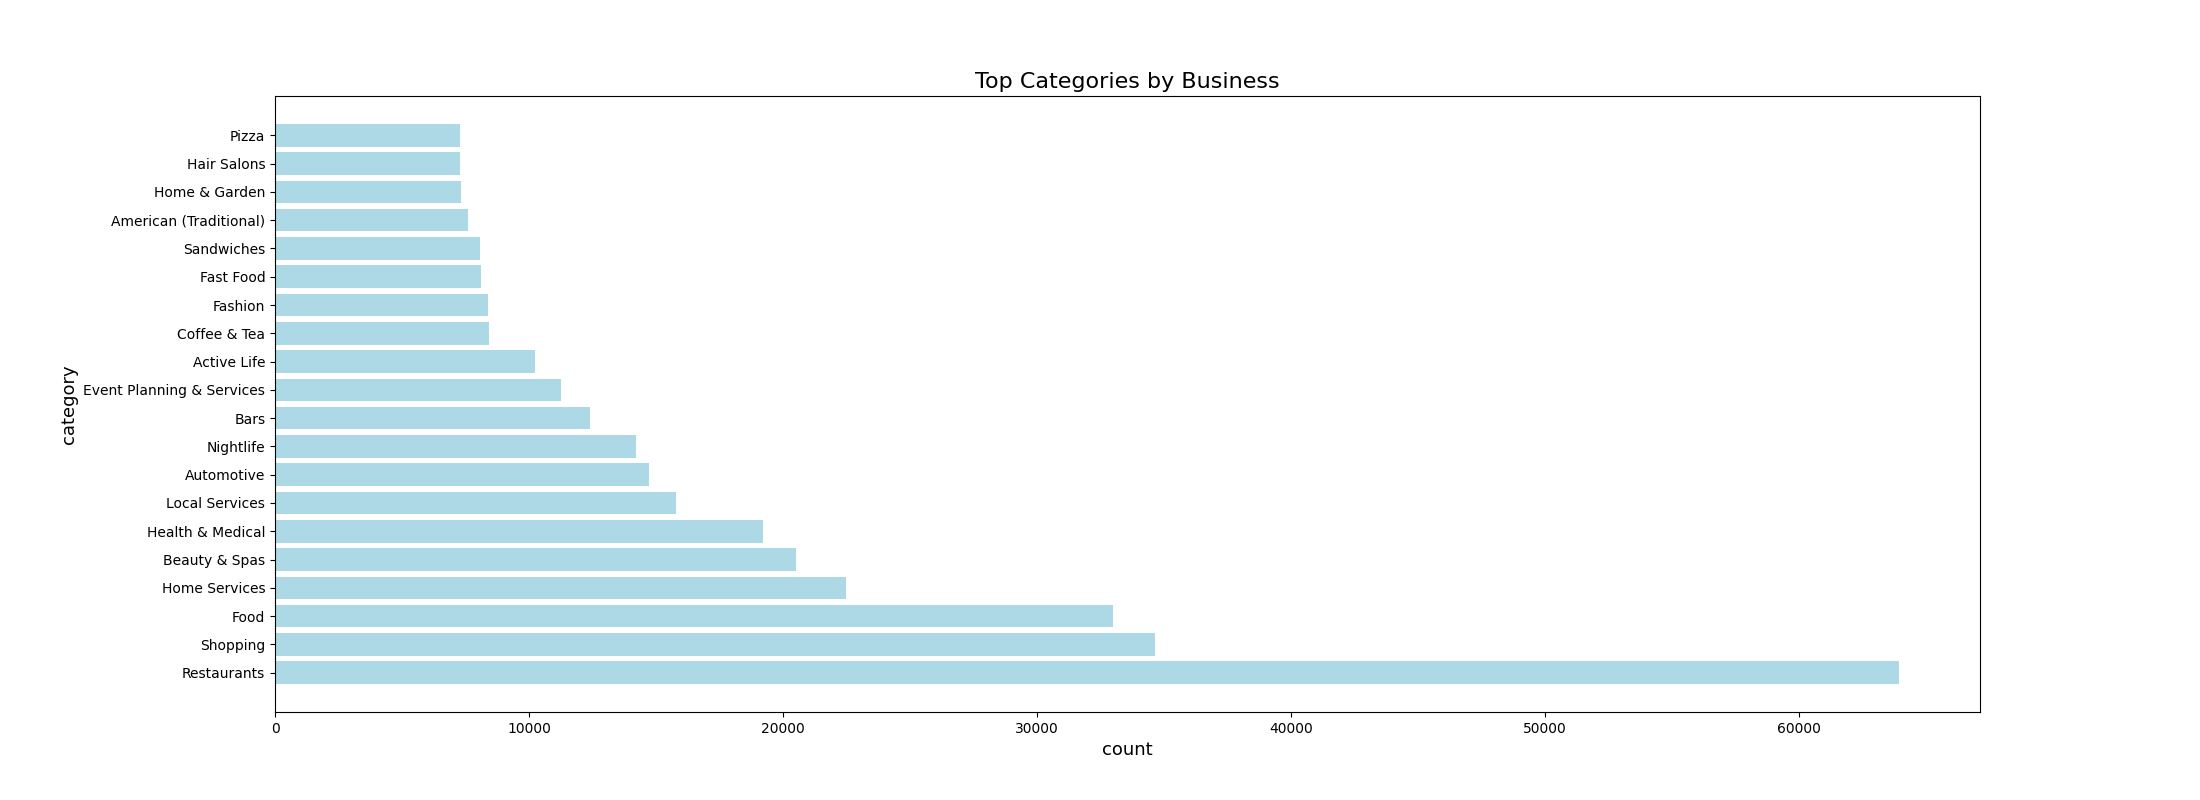

In [231]:
%matplot plt

# Do Yelp Reviews Skew Negative?

Oftentimes, it is said that the only people who write a written review are those who are extremely _dissatisfied_ or extremely _satisfied_ with the service received. 

How true is this really? Let's try and answer this question.

## Loading User Data

Begin by loading the user data set from S3 and printing schema to determine what data is available.

In [146]:
df_review = spark.read.json('s3://sta9760f2020spark/yelp/yelp_academic_dataset_review.json')
df_review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Let's begin by listing the `business_id` and `stars` columns together for the user reviews data.

In [189]:
df_review_id_stars = df_review.select('business_id','stars')
df_review_id_stars.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the `stars` column to get a resultant dataframe that displays _average stars_ per business as accumulated by users who **took the time to submit a written review**.

In [374]:
df_review_avg_stars = df_review_id_stars.groupby('business_id').avg('stars')
df_review_avg_stars.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+
|         business_id|       avg(stars)|
+--------------------+-----------------+
|kpbhERZoj1eTDRnMV...|2.033333333333333|
|ipFreSFhjClfNETuM...|              2.6|
|dLDMU8bOLnkDTmPUr...|4.942857142857143|
|dq_s3i3_FHA3ptnhs...|4.423076923076923|
|Qm2datcYBPXrPATVG...|4.352941176470588|
+--------------------+-----------------+
only showing top 5 rows

Now the fun part - let's join our two dataframes (reviews and business data) by `business_id`. 

In [375]:
df_joined = df_review_avg_stars.join(df_business, df_review_avg_stars.business_id == df_business.business_id, 'left')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Let's see a few of these:

In [376]:
df_joined.select('avg(stars)','stars','name','city','state').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+-----+--------------------+---------+-----+
|      avg(stars)|stars|                name|     city|state|
+----------------+-----+--------------------+---------+-----+
|4.11784140969163|  4.0|Delmonico Steakhouse|Las Vegas|   NV|
|             4.5|  4.5|Mr. Pancho Mexica...|     Mesa|   AZ|
|            3.75|  4.0|Maricopa County D...|  Phoenix|   AZ|
|             4.0|  4.0|Double Play Sport...|Las Vegas|   NV|
|          2.6875|  2.5|  Impressions Dental| Chandler|   AZ|
+----------------+-----+--------------------+---------+-----+
only showing top 5 rows

Compute a new dataframe that calculates what we will call the _skew_ (for lack of a better word) between the avg stars accumulated from written reviews and the _actual_ star rating of a business (ie: the average of stars given by reviewers who wrote an actual review **and** reviewers who just provided a star rating).

The formula you can use is something like:

```
(row['avg(stars)'] - row['stars']) / row['stars']
```

If the **skew** is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If **skew** is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [377]:
df_skew = df_joined.withColumn('skew',(df_joined['avg(stars)']-df_joined['stars'])/(df_joined['stars']))
df_skew = df_skew.select('skew')
df_skew.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|                skew|
+--------------------+
|-0.02521008403361...|
|0.009041591320072382|
|0.040000000000000036|
|-0.01142857142857...|
|-0.03267973856209158|
+--------------------+
only showing top 5 rows

And finally, graph it!

In [378]:
df_skew = df_skew.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

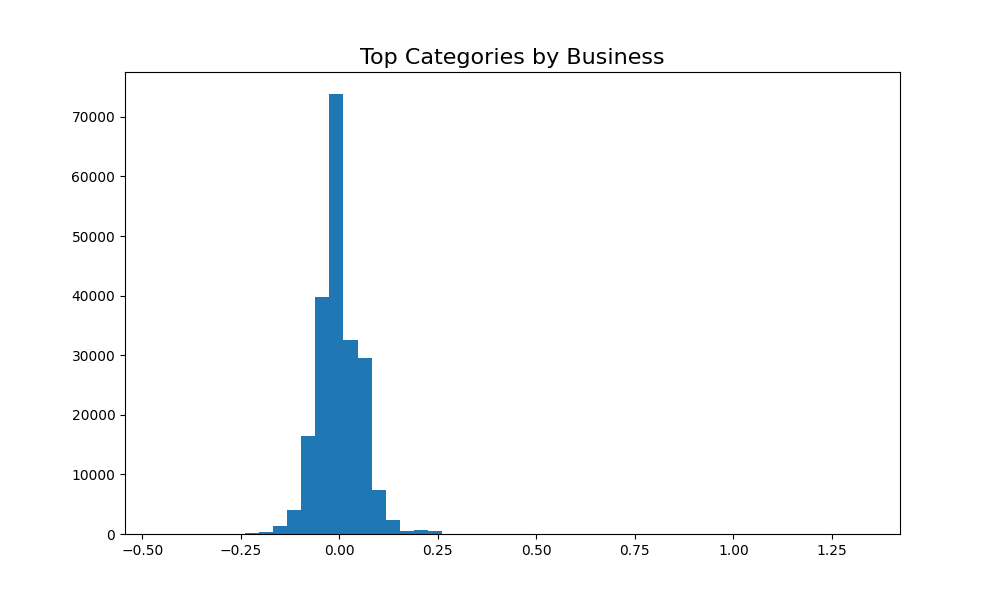

In [379]:
plt.figure(figsize=(10,6))
plt.title('Top Categories by Business', fontsize = 16)

plt.hist(df_skew['skew'], bins = 50)

%matplot plt

So, do Yelp (written) Reviews skew negative? Does this analysis actually prove anything? Expound on implications / interpretations of this graph. 

**Conclusion**: From the histogram, written Yelp reviews skew negative. It suggests that reviewers who write reviews on Yelp are mostly doing so because they want to make complaints. Therefore, readers who read these written reviews should know that they might become biased. Realistically, users should also look at other factors like pictures or suggestions from friends.  

# Should the Elite be Trusted? (Or, some other analysis of your choice)

For the final portion - you have a choice:

* Try and analyze some interesting dimension to this data. The **ONLY** requirement is that you must use the **Users** dataset and join on either the **business* or **reviews** dataset
* Or, you may try and answer the question posed: how accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating.

Feel free to use any and all methodologies at your disposal - only requirement is you must render one visualization in your analysis

### Importing User Data

In [262]:
#load user data from S3 bucket and make it a Spark DF
df_user = spark.read.json('s3://sta9760f2020spark/yelp/yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [234]:
#see df_user schema
df_user.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [255]:
#inspect first 10 rows of df_user, selecting certain columns just to inspect data
df_user.select('elite','average_stars','review_count','user_id').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+------------+--------------------+
|               elite|average_stars|review_count|             user_id|
+--------------------+-------------+------------+--------------------+
|                    |         3.57|         553|ntlvfPzc8eglqvk92...|
|2008,2009,2010,20...|         3.84|         564|FOBRPlBHa3WPHFB5q...|
|                2010|         3.44|          60|zZUnPeh2hEp0WydbA...|
|                2009|         3.08|         206|QaELAmRcDc5TfJEyl...|
|2009,2010,2011,20...|         4.37|         485|xvu8G900tezTzbbfq...|
|                2007|         2.88|         186|z5_82komKV3mI4ASG...|
|                    |          4.0|          12|ttumcu6hWshk_EJVW...|
|2011,2012,2013,20...|         3.63|         822|f4_MRNHvN-yRn7EA8...|
|                    |         3.75|          14|UYACF30806j2mfbB5...|
|           2008,2009|          4.1|         218|QG13XBbgHWydzThRB...|
+--------------------+-------------+------------+--------------------+
only s

### Joining User and Review 

In [322]:
#join df_user and df_review on user_id
df_user_review = df_user.join(df_review, df_user.user_id == df_review.user_id, 'left')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [323]:
#inspect df_user_review
df_user_review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable =

### Analysis

Will compare the average score or **elites** to the average score of **non-elites** grouped by business_id.

In [355]:
#Elite
df_elite = df_user_review.filter(df_user_review['elite'] != '').groupby('business_id').avg('stars') \
                            .withColumnRenamed("avg(stars)", "avg_elite_stars")
df_elite.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|   avg_elite_stars|
+--------------------+------------------+
|RtUvSWO_UZ8V3Wpj0...| 4.156193895870736|
|llCxryWr8j1S39tus...|              4.25|
|cz5vz-893D3LNH3TM...|3.8587570621468927|
|eKznX8VTfcQrjCqXp...| 4.268817204301075|
|oVTvVdJiaRAwBLy6H...| 4.166666666666667|
+--------------------+------------------+
only showing top 5 rows

In [356]:
#Non-Elite
df_non_elite = df_user_review.filter(df_user_review['elite'] == '').groupby('business_id').avg('stars') \
                            .withColumnRenamed("avg(stars)","avg_non_elite_stars")
df_non_elite.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------------+
|         business_id|avg_non_elite_stars|
+--------------------+-------------------+
|--9e1ONYQuAa-CB_R...|   4.08596214511041|
|RtUvSWO_UZ8V3Wpj0...|  4.121583411875589|
|kpbhERZoj1eTDRnMV...| 1.9642857142857142|
|umwULmdsxx8aTsoRQ...|               2.25|
|ru_WUOAmx9xPBxcJu...|                5.0|
+--------------------+-------------------+
only showing top 5 rows

In [358]:
#Join Elite and Non-Elite
df_elite_non_elite = df_elite.join(df_non_elite, df_elite['business_id'] == df_non_elite['business_id'], 'left')
df_elite_non_elite.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+--------------------+-------------------+
|         business_id|   avg_elite_stars|         business_id|avg_non_elite_stars|
+--------------------+------------------+--------------------+-------------------+
|--9e1ONYQuAa-CB_R...|4.1916058394160585|--9e1ONYQuAa-CB_R...|   4.08596214511041|
|--phjqoPSPa8sLmUV...|               4.0|--phjqoPSPa8sLmUV...|              3.625|
|--q7kSBRb0vWC8lSk...|               4.0|--q7kSBRb0vWC8lSk...|                4.0|
|-0ZO00Vm2ADchytlE...|               5.0|-0ZO00Vm2ADchytlE...| 4.9743589743589745|
|-1VaIJza42Hjev6uk...| 3.793103448275862|-1VaIJza42Hjev6uk...|  3.812749003984064|
+--------------------+------------------+--------------------+-------------------+
only showing top 5 rows

Next, I want to compare the ratio of **avg_elite_stars** to **avg_non_elite_stars**. The greater the ratio, the more positive elite reviews are in general. The smaller the ratio, the more negative elite reviews are in general. 

In [361]:
df_elite_ratio = df_elite_non_elite \
                .withColumn('elite_ratio',(df_elite_non_elite['avg_elite_stars']/df_elite_non_elite['avg_non_elite_stars']))
df_elite_ratio = df_elite_ratio.select('elite_ratio')
df_elite_ratio.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+
|       elite_ratio|
+------------------+
|1.0258552797489986|
| 1.103448275862069|
|               1.0|
|1.0051546391752577|
|0.9948474038842647|
+------------------+
only showing top 5 rows

### Visualization

A histogram can neatly display the elite_ratio.

In [362]:
#convert to pandas
df_elite_ratio = df_elite_ratio.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

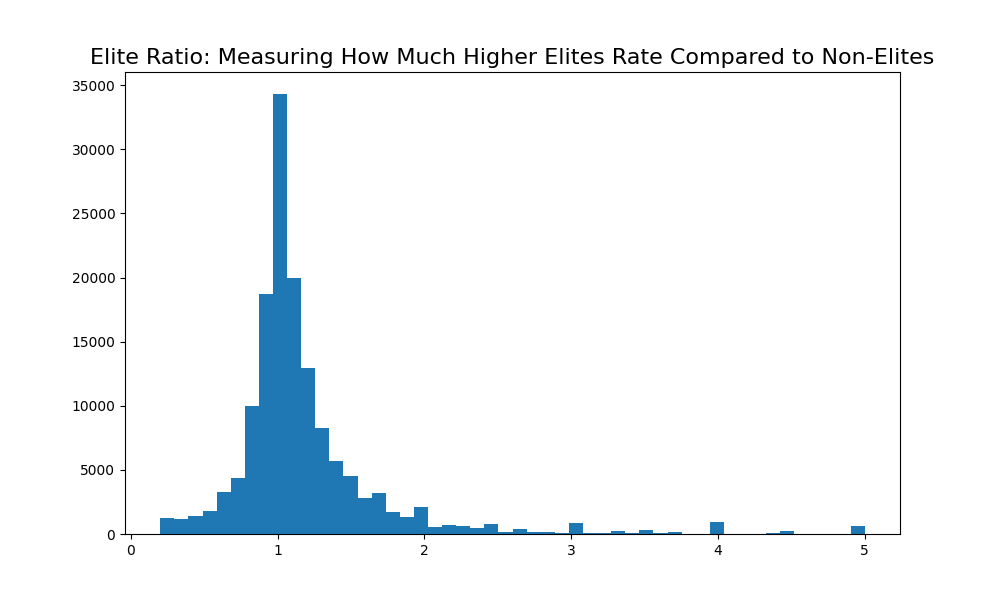

In [364]:
plt.figure(figsize=(10,6))
plt.title('Elite Ratio: Measuring How Much Higher Elites Rate Compared to Non-Elites', fontsize = 16)

plt.hist(df_elite_ratio['elite_ratio'], bins = 50)

%matplot plt

**Conclusion**: The distribution has a long right tail, but the ratio has a median score of around 1. This implies that elite reviewers agree most of the time with non-elite reviewers, making elite reviews likely trustable and a good gauge of opinion. However, there might be a tendency for small groups of elite reviewers to overhype their experience compared to non-elite users. This is important for Yelp users to avoid buying into hype when reading elite reviews.

# Additional Research Question: Do Yelp reviewers generally become more cynical as they review more stuff?

A good way to see if there is a positive or negative trend is by making a scatterplot graph comparing the **average_stars** of a user to their **review_count**.

In [367]:
#create df with the two columns
df_cynical = df_user.select("average_stars","review_count")
df_cynical.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+------------+
|average_stars|review_count|
+-------------+------------+
|         3.57|         553|
|         3.84|         564|
|         3.44|          60|
|         3.08|         206|
|         4.37|         485|
+-------------+------------+
only showing top 5 rows

In [368]:
#convert to pandas
df_cynical = df_cynical.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

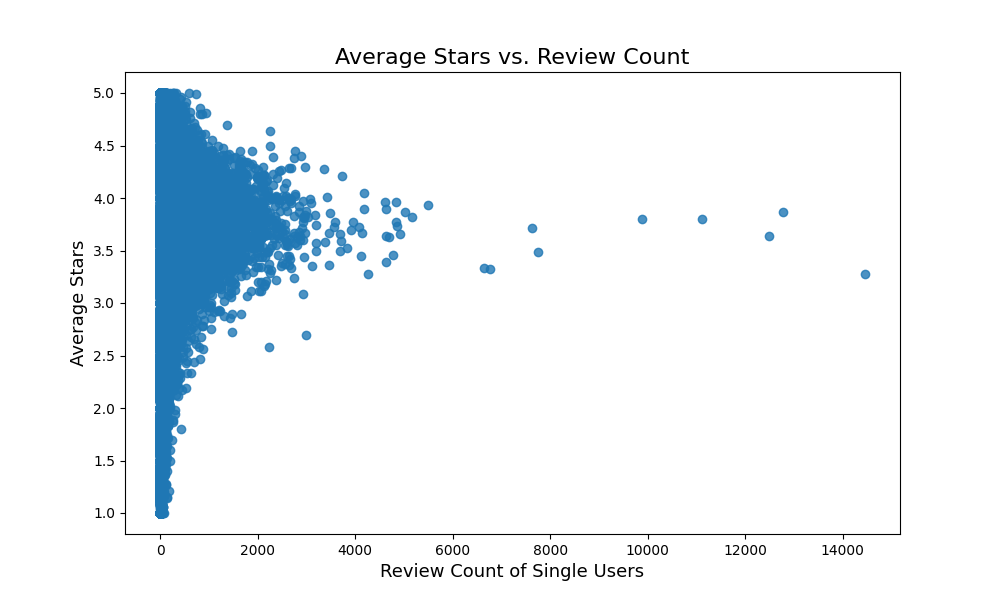

In [373]:
#visualize

plt.figure(figsize=(10,6))
plt.title('Average Stars vs. Review Count', fontsize = 16)
plt.ylabel('Average Stars', fontsize = 13 )
plt.xlabel('Review Count of Single Users', fontsize = 13 )

plt.scatter(y=df_cynical['average_stars'], x=df_cynical['review_count'], alpha=.8)

%matplot plt

**Conclusion**: there is not a strong negative or positive correlation between review count and average stars. So, one cannot say that the more you review the more cynical you get. Most reviews are interestingly around a 3.7, suggesting that people are slightly positive on Yelp when they review. 